**Data downloading**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [3]:
%cd /content/drive/MyDrive/kaggle/

/content/drive/MyDrive/kaggle


In [4]:
!kaggle datasets download -d msambare/fer2013

100% 60.3M/60.3M [00:01<00:00, 61.5MB/s]
100% 60.3M/60.3M [00:01<00:00, 50.4MB/s]


In [5]:
import zipfile

In [6]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/kaggle/fer2013.zip", 'r')
zip_ref.extractall("/content/drive/MyDrive/kaggle/")
zip_ref.close()


**Libraries importing**

In [7]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras.optimizers import Adam, RMSprop, SGD
from keras import regularizers
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
import datetime
import matplotlib.pyplot as plt
from keras.utils import plot_model

**Data importing**

In [8]:

FER_Train = '/content/drive/MyDrive/kaggle/train/'

row, col = 48, 48
classes = 7

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df

FER_training_data = count_exp(FER_Train , 'train')

print(FER_training_data)

       angry  disgust  fear  happy  neutral   sad  surprise
train   3995      436  4097   7215     4965  4830      3171


In [9]:

FER_test = '/content/drive/MyDrive/kaggle/test/'

row, col = 48, 48
classes = 7

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df

FER_testing_data = count_exp(FER_test , 'test')

print(FER_testing_data)

      angry  disgust  fear  happy  neutral   sad  surprise
test    958      111  1024   1774     1233  1247       831


**Data visualization**

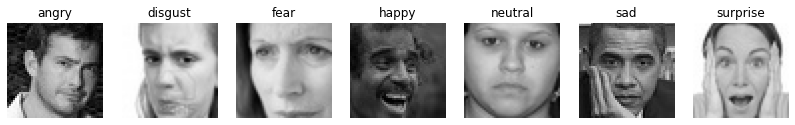

In [23]:
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(FER_Train):
    img = load_img((FER_Train + expression +'/'+ os.listdir(FER_Train + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ba40c7af0>],
      dtype=object)

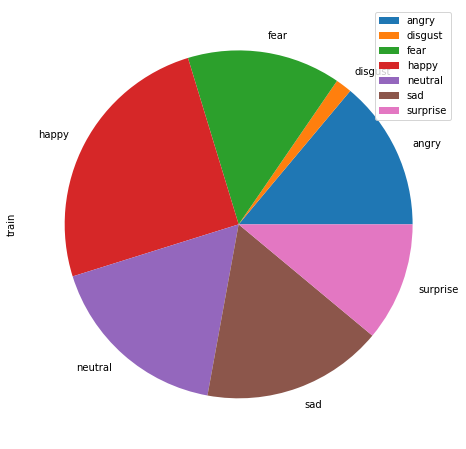

In [25]:
FER_training_data.transpose().plot(kind="pie",subplots=True,figsize=(8, 8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ba4d846d0>],
      dtype=object)

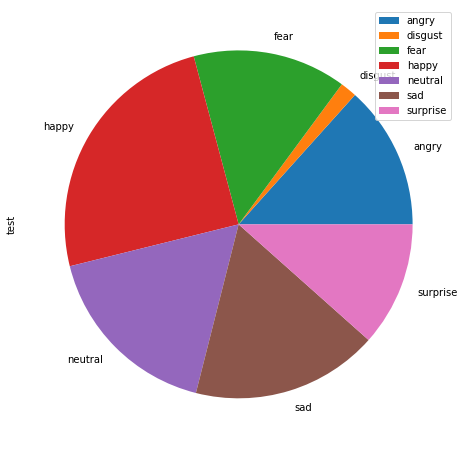

In [26]:
FER_testing_data.transpose().plot(kind="pie",subplots=True,figsize=(8, 8))

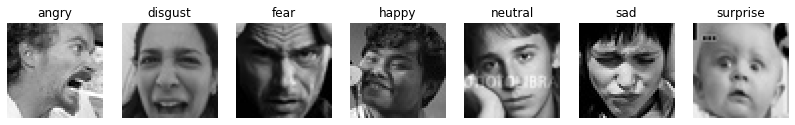

In [24]:
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(FER_test):
    img = load_img((FER_test + expression +'/'+ os.listdir(FER_test + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

**Data preperation**

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(FER_Train,
                                                batch_size=512,
                                                target_size=(48,48),
                                                color_mode='grayscale',
                                                class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(FER_test,
                                                batch_size=512,
                                                target_size=(48,48),
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
training_set.class_indices

**Model design**

In [19]:

     #Initialising the CNN
model = tf.keras.models.Sequential()   

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
    
model.add(Dense(7, activation='softmax'))

    #Compliling the model
model.compile(optimizer=Adam(lr=0.0001, decay=1e-6), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


** Model training**

In [ ]:
history = model.fit(x=training_set,
                 validation_data=test_set,
                 epochs=25)

Epoch 1/25
25/25 [==============================] - 1618s 65s/step - loss: 0.4837 - binary_accuracy: 0.7708 - val_loss: 0.4812 - val_binary_accuracy: 0.8292
Epoch 2/25
25/25 [==============================] - 1671s 65s/step - loss: 0.3799 - binary_accuracy: 0.8342 - val_loss: 0.4251 - val_binary_accuracy: 0.8278
Epoch 3/25
25/25 [==============================] - 1542s 61s/step - loss: 0.3736 - binary_accuracy: 0.8391 - val_loss: 0.3651 - val_binary_accuracy: 0.8311
Epoch 4/25
25/25 [==============================] - 1672s 67s/step - loss: 0.3654 - binary_accuracy: 0.8425 - val_loss: 0.3612 - val_binary_accuracy: 0.8325
Epoch 5/25
25/25 [==============================] - 1619s 68s/step - loss: 0.3512 - binary_accuracy: 0.8522 - val_loss: 0.3548 - val_binary_accuracy: 0.8389
Epoch 6/25
25/25 [==============================] - 1644s 65s/step - loss: 0.3457 - binary_accuracy: 0.8566 - val_loss: 0.3511 - val_binary_accuracy: 0.8412
Epoch 7/25
25/25 [==============================] - 1543s 

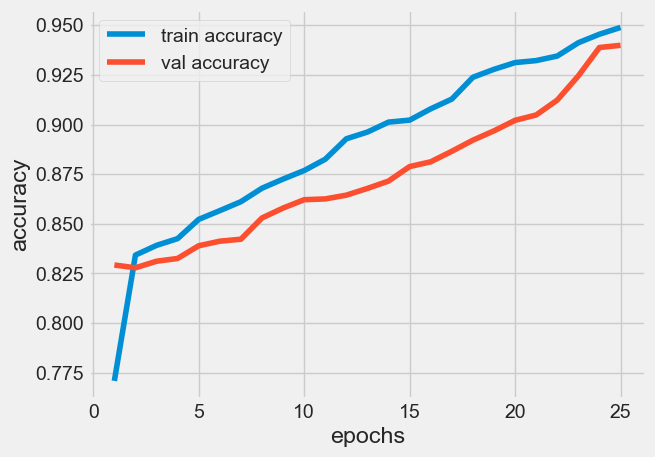

In [ ]:
epochs = list(range(25))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

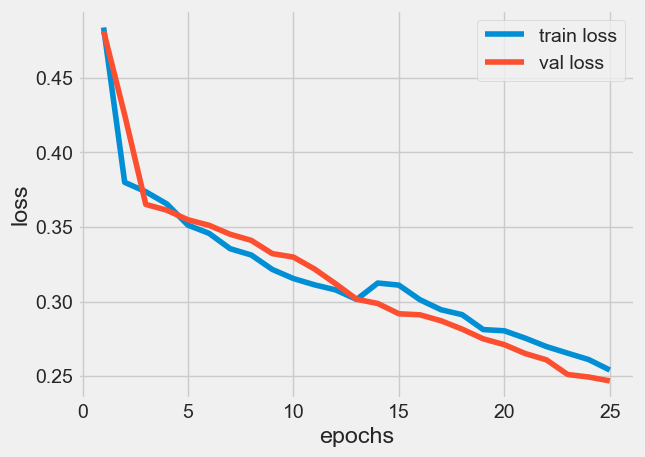

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**Model evaluation**

In [21]:
y_pred = model.predict(training_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(training_set.classes, y_pred)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[ 518   51  533 1045  726  684  438]
[  80    9   54  103   71   68   51]
[ 604   56  539 1048  720  674  456]
[ 984  107  954 1847 1319 1207  797]
[ 666   66  633 1269  896  886  549]
[ 637   67  671 1222  901  773  559]
[ 424   48  426  828  605  511  329]]


In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

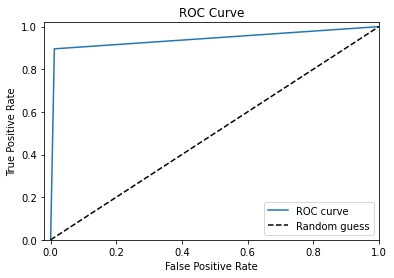

In [ ]:
fpr, tpr, thresholds = roc_curve(training_set.classes, y_pred)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

In [ ]:
def cal_ma(cm):
    total = 0
    for matrix in cm:
        cal_tp=0
        cal_tn=0
        TN, FP, FN, TP = matrix.ravel()
        P = FP + TP
        N = TN + FN
        if P!=0:
            cal_tp = TP/P
        if N!=0:
            cal_tn = TN / N
        total += (cal_tp+cal_tn)
    mA = total / (2 * len(cm))
    return mA

cal_ma(cm)


0.902


In [ ]:
def cal_Acc(cm):
    total = 0
    for matrix in cm:
        TN, FP, FN, TP = matrix.ravel()
        total += (TP + TN) / (TP + TN + FP + FN) #TP + TN is true prediction
    return total / len(cm)

cal_Acc(cm)

0.928


In [ ]:
def cal_Prec(cm):
    total = 0
    for matrix in cm:
        TN, FP, FN, TP = matrix.ravel()
        if (TP + FP)==0:
            continue
        total += (TP) / (TP + FP) 
    return total / len(cm)

cal_Prec(cm)

0.921


In [ ]:
def cal_Rec(cm):
    total = 0
    for matrix in cm:
        TN, FP, FN, TP = matrix.ravel()
        if TP+FN==0:
            continue
        total += (TP) / (TP + FN)
    return total / len(cm)
cal_Rec(cm)

0.902


In [ ]:
def cal_F1(cm):
    prec = cal_Prec(cm)
    rec = cal_Rec(cm)
    return 2 * prec * rec / (prec + rec)

cal_F1(cm)

0.911
